In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('WineQT.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

IndexError: index 12 is out of bounds for axis 0 with size 12

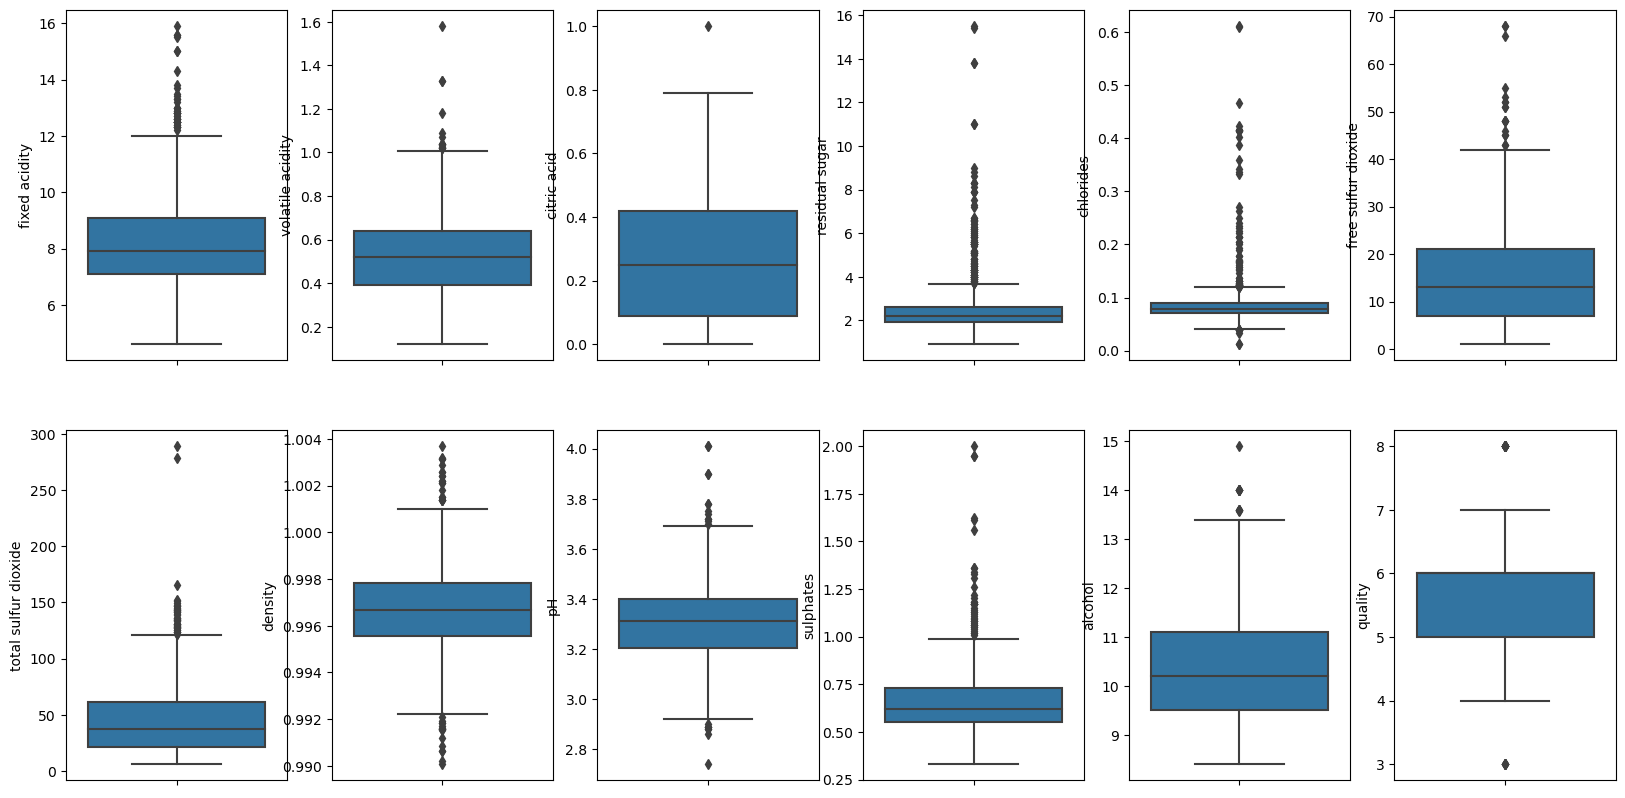

In [12]:
fig,ax = plt.subplots(ncols = 6,nrows = 2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col ,value in df.items():
    if col!='type':
        sn.boxplot(y=col,data = df,ax = ax[index])
        index += 1

IndexError: index 12 is out of bounds for axis 0 with size 12

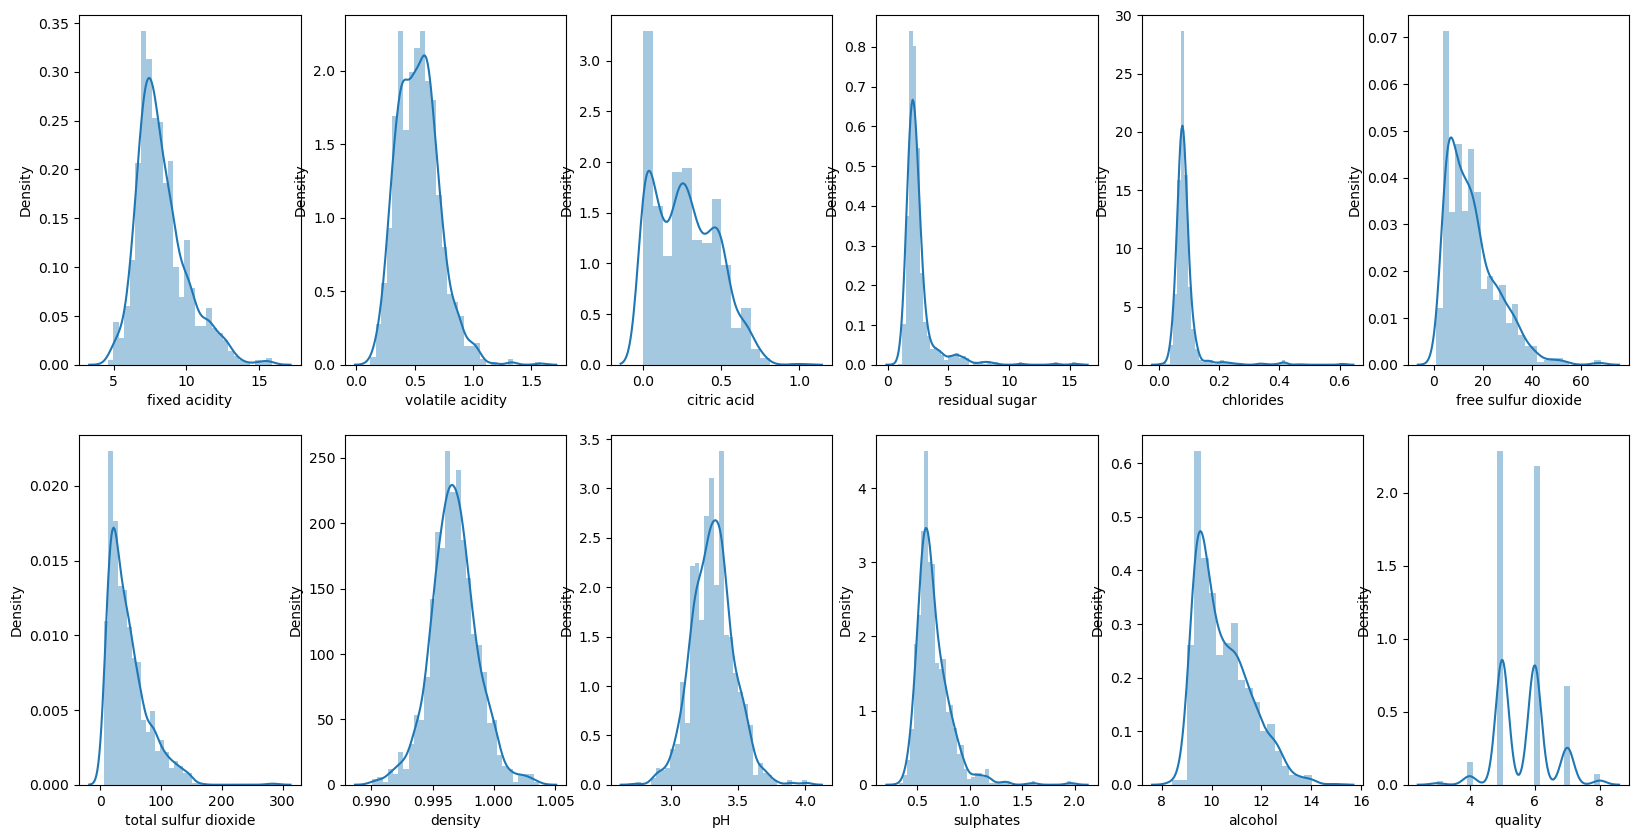

In [15]:
fig,ax = plt.subplots(ncols = 6,nrows = 2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col ,value in df.items():
    if col!='type':
        sn.distplot(value,ax = ax[index])
        index += 1
plt.tight_layout(pad=0.5,w_pad = 0.7,h_pad = 5.0)

In [18]:
df['free sulphur dioxide']=np.log(1+df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

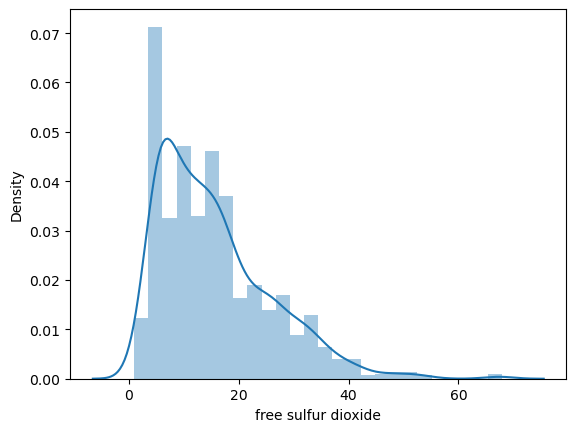

In [19]:
sn.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

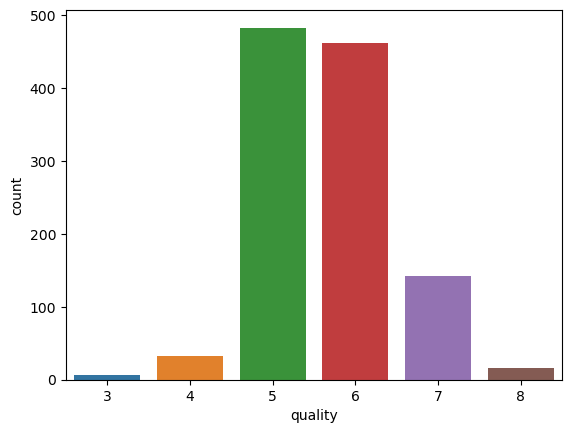

In [21]:
sn.countplot(df['quality'])

<AxesSubplot:>

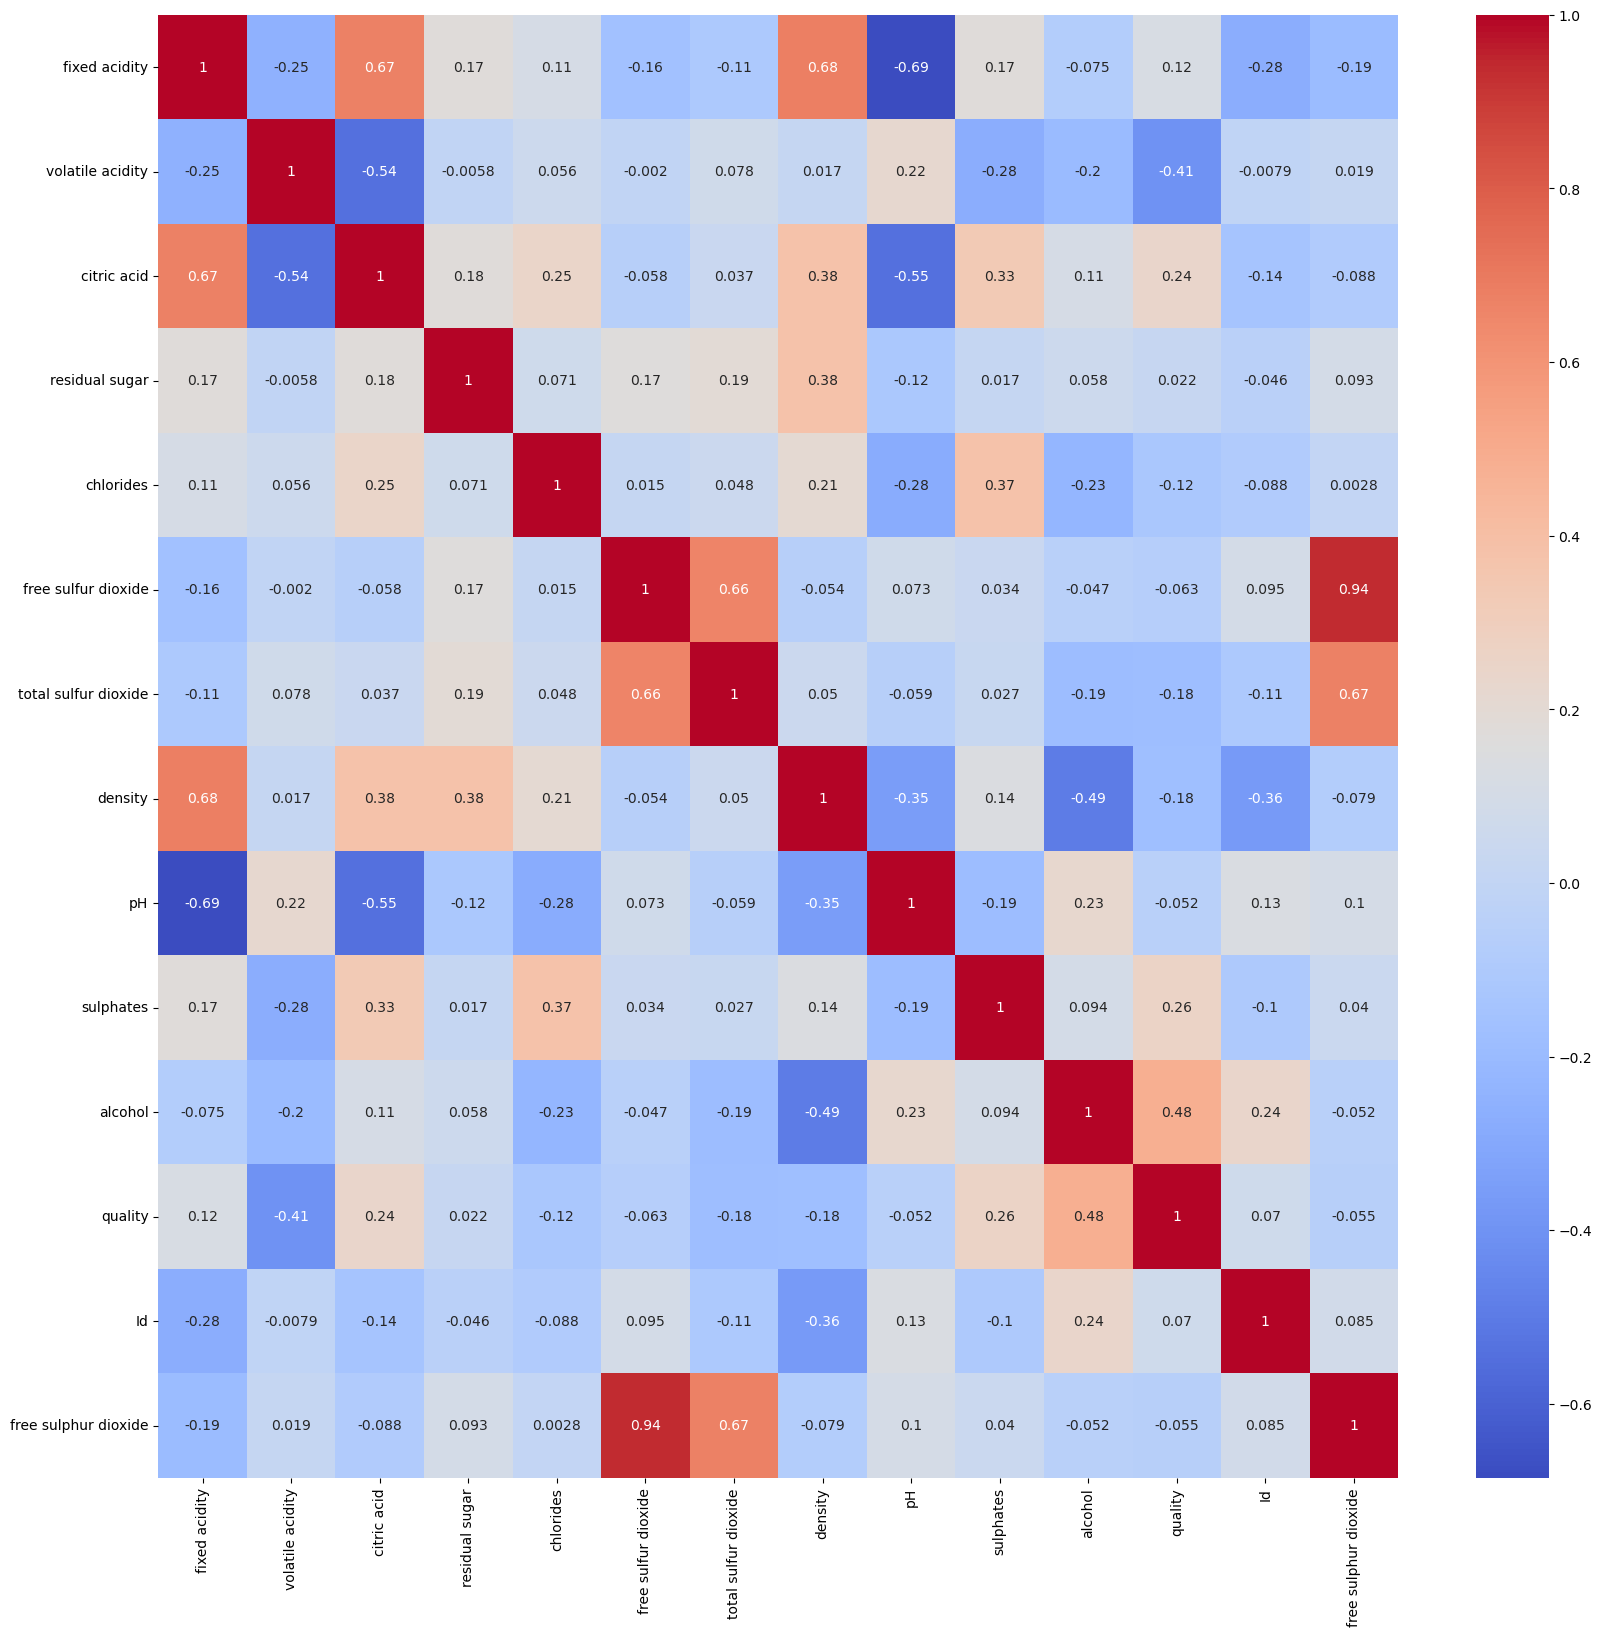

In [22]:
corr = df.corr()
plt.figure(figsize = (20,19))
sn.heatmap(corr,annot = True,cmap = 'coolwarm')

In [24]:
 x= df.drop(columns=['Id','quality'])
y = df['quality']

In [25]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Evaluating accuracy on the test set
    accuracy = model.score(x_test, y_test) * 100
    print("Accuracy:", accuracy)
    
    # Cross-validation
    scores = cross_val_score(model, x, y, cv=5)
    cv_score = np.mean(scores) * 100
    print("CV Score:", cv_score)

# Example usage:
# classify(your_model, your_features, your_labels)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


np.random.seed(42)
X = np.random.rand(100, 2)  
y = (X[:, 0] + 2 * X[:, 1] + 0.5 + 0.1 * np.random.randn(100)) > 1.5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy * 100)


cv_scores = cross_val_score(model, X, y, cv=5)
cv_accuracy = np.mean(cv_scores)
print("Cross-Validation Accuracy:", cv_accuracy * 100)


Accuracy: 92.0
Cross-Validation Accuracy: 87.99999999999999


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples with 2 features each
y = (X[:, 0] + 2 * X[:, 1] + 0.5 + 0.1 * np.random.randn(100)) > 1.5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier()


model.fit(X_train, y_train)


predictions = model.predict(X_test)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy * 100)


cv_scores = cross_val_score(model, X, y, cv=5)
cv_accuracy = np.mean(cv_scores)
print("Cross-Validation Accuracy:", cv_accuracy * 100)


Accuracy: 96.0
Cross-Validation Accuracy: 93.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


np.random.seed(42)
X = np.random.rand(100, 2)  
y = (X[:, 0] + 2 * X[:, 1] + 0.5 + 0.1 * np.random.randn(100)) > 1.5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy * 100)

cv_scores = cross_val_score(model, X, y, cv=5)
cv_accuracy = np.mean(cv_scores)
print("Cross-Validation Accuracy:", cv_accuracy * 100)


Accuracy: 92.0
Cross-Validation Accuracy: 87.99999999999999
